# Distribuciones de frecuencia

Las distribuciones de frecuencia son tablas que presentan un conteo de los datos. Lo más relevante, y es el que tema que trataremos, son las <u>*distribuciones de frecuencias agrupadas*</u> , puesto que para su confección se requieren tomar decisiones importantes:

- ¿Cuántos grupos (intervalos) deben formarse?

- ¿Qué amplitud tomarán esos grupos?

Es evidente que ambas decisiones están relacionadas. Muy pocos intervalos requieren amplitudes grandes para cubrir todo el rango de datos, en especial si estos son dispersos. Gran cantidad de intervalos requieren amplitudes más pequeñas.

También debe mencionarse que hay un costo de oportunidad entre amplitud/cantidad de intervalos y pérdida de información. No tiene sentido tener tantos intervalos como cantidad de datos, pero muy pocos intervalos demasiado amplios ocultan la variedad de los datos.

## Glosario
- *k* = cantidad de intervalos

- *h* o *i* =  amplitud

- n = número de datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import random

## Realización manual

Siempre se puede optar por la realización paso por paso de una distribución de frecuencias, de forma de presentar los datos exactamente como queremos.

Sin embargo, es evidente que esto conlleva problemas y riesgos:

- En primer lugar, es bastante más costoso hacer una distribución sin aprovechar las ventajas de funciones ya diseñadas para tales efectos.

- Más importante, las distribuciones de frecuencia trabajan con intervalos contigüos. Esto implica que en los límites verdaderos se reduce a la mitad la **unidad de variación**. Así, si la precisión de la medición es de dos decimales, los límites tendrán tres.

¿Por qué esto es importante? Porque cuando tenemos datos de ejemplo, o de ejercicios de manuales de estadística, es fácil saber en qué posición decimal hacer esa reducción. Pero cuando tenemos *datasets* muy grandes, esto puede llevar a errores que desemboquen en un mal conteo y subsiguiente representación incorrecta de los datos.

In [ ]:
# Función para contar el número de decimales
def contar_decimales(num: int|float) -> int:
    """
    Cuenta los decimales de un número. Devuelve un número entero que es la
    cantidad de decimales del argumento.
    """

    # Todos los números, ya sean float o int, se convierten a float.
    num2 = float(num)
    if num2.is_integer():  # Una vez asegurada la condición float, se puede aplicar el método 'is_interger()'.
        num2 = int(num2) # De esta manera, si es entero se borra el decimal '.0'.

    # Convertir el número a string y separar en parte entera y decimal
    num_str = str(num2)
    if '.' in num_str: # Si no hubiéramos eliminado el '.0', los enteros darían verdadero en esta condición y se contaría el '.0' como decimal.
        return len(num_str.split('.')[1])
        """
        El método .split() divide el string en el caracter especificado en el argumento;
        las dos partes se juntan en una lista (sin incluir en ninguna al carácter de la
        separación).
        Como el resultado de num_str.split('.') es una lista y se quiere acceder a la
        parte decimal, se coloca '[1]', que es la posición de la parte decimal en la lista.
        Ambas partes siguen siendo strings, el len() cuenta la cantidad de caracteres del
        string que contiene los decimales del número original.
        """
    else:
        return 0


# Función para saber los límites verdaderos de los intervalos
def limites_verdaderos(lim_ap_inf: int|float, lim_ap_sup: int|float) -> list:
    """
    Esta función permite saber los límites verdaderos de los intervalos en una distribución de
    frecuencia. Los argumentos son los límites aparentes de un intervalo (de menor a mayor).
    Devuelve una lista con los límites verdaderos. Es consistente con la precisión de medición
    de los datos. Si se mide en enteros, el límite verdadero tiene una precisión de décimas. Si
    la precisión es en décimas, el límite verdadero tiene una precisión de centésimas, y así
    sucesivamente.
    """

    # Usamos la función contar_decimales() para generar una lista con la cantidad de decimales de cada límite de un intervalo
    lista_decimales = [contar_decimales(lim_ap_inf), contar_decimales(lim_ap_sup)]

    # De esa lista, extraemos la cantidad mayor. Así sabemos la precisión de la medición (entero, decimal, centesimal, etc.)
    numero_max_decimales_por_pareja = max(lista_decimales)

    # Convertimos a float el argumento de la función para poder usar el método 'is_interger()""
    if float(lim_ap_inf).is_integer() and float(lim_ap_sup).is_integer():
        limite_inf = lim_ap_inf - 0.5 # Si es entero, sumamos y restamos decimales
        limite_sup = lim_ap_sup + 0.5

    else:
        limite_inf = round(lim_ap_inf - 5*(10** -(numero_max_decimales_por_pareja+1)), numero_max_decimales_por_pareja+1) # 5 por 10 elevado a la menos... La cantidad de decimales máximo + 1 (si es décima, se suman o restan centésimas, y así sucesivamente)
        limite_sup = round(lim_ap_sup + 5*(10** -(numero_max_decimales_por_pareja+1)), numero_max_decimales_por_pareja+1)

        """
        Para el resto de los casos, sumamos y restamos en la posición igual al número máximo de
        decimales que encontramos más 1:
            - Si el número tiene 1 decimal, se suman y restan centésimas (2 decimales)
            - Si el número tiene 2 dcimales, se suman y restan milésimas (3 decimales)
        """
    return [limite_inf, limite_sup]

## Funciones

Python (sus módulos de tratamiento de datos) desarrolló funciones para hacer las cosas más fáciles. Pero, hay que tener buenos conocimientos teóricos de las distribuciones de frecuencia para no usar las funciones de manera acrítica.

Trabajaremos con el siguiente conjunto de datos.

In [ ]:
datos = [17, 56, 46, 13, 52, 82, 86, 50, 45, 1,
         86, 23, 72, 38, 71, 4, 23, 53, 19, 50,
         5, 58, 8, 70, 34, 3, 59, 56, 60, 74,
         76, 40, 46, 43, 27, 51, 28, 67, 45, 85,
         95, 74, 44, 15, 60, 7, 83, 90, 35, 28,
         41, 2, 72, 17, 80, 72, 97, 35, 30, 43,
         96, 32, 68, 67, 84, 99, 34, 63, 13, 84,
         39, 5, 38, 11, 18, 20, 48, 52, 48, 79,
         58, 19, 84, 52, 59, 23, 75, 92, 73, 44,
         22, 12, 11, 45, 49, 92, 83, 88, 28, 18]

### *Bins*

Lo más relevante son los puntos de corte *bins* de los intervalos (o clases) que usan límites verdaderos. Esto impacta tanto en la cantidad de clases como en su amplitud.

La función *pd.cut()* construye los intervalos y asigna cada dato a un intervalo. Los puntos de corte se expresan en el argumento *bins*.

Se pueden pasar los puntos de corte exactos que nosotros queremos. Hay que incluir el límite inferior el primer intervalo y el límite superior del último intervalo:

In [ ]:
datos_en_intervalos = pd.cut(datos, bins = [1, 11, 21, 31, 41, 51,61,71,81,91, 101], right = False)
datos_en_intervalos

[[11, 21), [51, 61), [41, 51), [11, 21), [51, 61), ..., [91, 101), [81, 91), [81, 91), [21, 31), [11, 21)]
Length: 100
Categories (10, interval[int64, left]): [[1, 11) < [11, 21) < [21, 31) < [31, 41) ... [61, 71) < [71, 81) < [81, 91) < [91, 101)]

En la primera línea se ve a qué intervalo está asignado cada datos, *según el orden de la lista de datos que hayamos pasado*:

- El primer dato es el 17 en la lista *datos*. Dicho número pertenece al intervalo [11, 21).

- El seugndo dato es el 56, que pertecene al intervalo [51, 61)

- Y así sucesivamente

La segunda línea lista los intervalos: son 10 categorías en este caso y las enumera de menor a mayor.ç

Los intervalos siempre son semiabiertos: incluyen un límite y excluyen otro. Vale decir, si el intervalo es [2, 5) el dos es un valor posible que cae dentro de ese intervalo, el 5 no. Si fuera (2, 5], sería al revés.

**El argumento *right***. Puede asumir los siguientes valores:

- *True*: los intervalos son cerrados a la derecha (incluyen el último valor). Esto implica que son abiertos a la izquierda. Es el valor por default.

- *False*: los intervalos son abiertos a la derecha. Esto implica que son abiertos a la izquierda. Lo mejor configurar este valor porque se corre el riesgo de no contar el valor mínimo de la distribución.

Seguidamente, las funciones *value_counts()* y *sort_index()* consturyen un conteo de frecuencias (*value_counts*) ordenado por intervalos de menor a mayor (*sort_index*. Los índices de la Serie son los intervalos).

In [ ]:
frecuencias = pd.Series(datos_en_intervalos).value_counts().sort_index()

distribucion = pd.DataFrame()
distribucion["Intervalos"] = frecuencias.index
distribucion["Frecuencia absoluta"] = frecuencias.values
distribucion["Frecuencia acumulada"] = distribucion["Frecuencia absoluta"].cumsum()
distribucion["Frecuencia relativa"] = round((distribucion["Frecuencia absoluta"] / distribucion["Frecuencia absoluta"].sum())* 100,2)
distribucion["Frecuencia relativa acumulada"] = round(distribucion["Frecuencia relativa"].cumsum(), 2)
distribucion

,Intervalos,Frecuencia absoluta,Frecuencia acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,"[1, 11)",8,8,8.0,8.0
1,"[11, 21)",13,21,13.0,21.0
2,"[21, 31)",9,30,9.0,30.0
3,"[31, 41)",9,39,9.0,39.0
4,"[41, 51)",15,54,15.0,54.0
5,"[51, 61)",13,67,13.0,67.0
6,"[61, 71)",5,72,5.0,72.0
7,"[71, 81)",11,83,11.0,83.0
8,"[81, 91)",11,94,11.0,94.0
9,"[91, 101)",6,100,6.0,100.0


### Opciones para calcular los *bins*.

Podemos usar opciones predeterminadas (expresadas como cadenas de caracteres) para calcular los *bins* automáticamente.

Para esto, usamos la función de *Numpy*, *np.histogram_bin_edges()*, a la cual hay que pasarle como argumento:

- Los datos originales.

- Cómo calcular los bins: estas formas responden a distintas alternativas dadas por teóricos estadísitcos, como la regla de Sturges, Freedman-Diaconis, etc. Pueden saber más de estas reglas en el siguiente enlace: https://medium.com/@maxmarkovvision/optimal-number-of-bins-for-histograms-3d7c48086fde

Se revisan algunas de las opciones disponibles.

#### Sturges

In [ ]:
bins = np.histogram_bin_edges(datos, bins = "sturges")
datos_en_intervalos = pd.cut(datos, bins = bins, right = False)
frecuencias = pd.Series(datos_en_intervalos).value_counts().sort_index()
distribucion = pd.DataFrame()
distribucion["Intervalos"] = frecuencias.index
distribucion["Frecuencia absoluta"] = frecuencias.values
distribucion["Frecuencia acumulada"] = distribucion["Frecuencia absoluta"].cumsum()
distribucion["Frecuencia relativa"] = round((distribucion["Frecuencia absoluta"] / distribucion["Frecuencia absoluta"].sum())* 100,2)
distribucion["Frecuencia relativa acumulada"] = round(distribucion["Frecuencia relativa"].cumsum(), 2)
distribucion

,Intervalos,Frecuencia absoluta,Frecuencia acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,"[1.0, 13.25)",13,13,13.13,13.13
1,"[13.25, 25.5)",12,25,12.12,25.25
2,"[25.5, 37.75)",10,35,10.10,35.35
3,"[37.75, 50.0)",17,52,17.17,52.52
4,"[50.0, 62.25)",15,67,15.15,67.67
5,"[62.25, 74.5)",12,79,12.12,79.79
6,"[74.5, 86.75)",13,92,13.13,92.92
7,"[86.75, 99.0)",7,99,7.07,99.99


#### Freedman y Diaconis

In [ ]:
bins = np.histogram_bin_edges(datos, bins = "fd")
datos_en_intervalos = pd.cut(datos, bins = bins, right = False)
frecuencias = pd.Series(datos_en_intervalos).value_counts().sort_index()
distribucion = pd.DataFrame()
distribucion["Intervalos"] = frecuencias.index
distribucion["Frecuencia absoluta"] = frecuencias.values
distribucion["Frecuencia acumulada"] = distribucion["Frecuencia absoluta"].cumsum()
distribucion["Frecuencia relativa"] = round((distribucion["Frecuencia absoluta"] / distribucion["Frecuencia absoluta"].sum())* 100,2)
distribucion["Frecuencia relativa acumulada"] = round(distribucion["Frecuencia relativa"].cumsum(), 2)
distribucion

,Intervalos,Frecuencia absoluta,Frecuencia acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,"[1.0, 20.6)",21,21,21.21,21.21
1,"[20.6, 40.2)",18,39,18.18,39.39
2,"[40.2, 59.8)",26,65,26.26,65.65
3,"[59.8, 79.4)",17,82,17.17,82.82
4,"[79.4, 99.0)",17,99,17.17,99.99


#### Raíz cuadrada del tamaño de la muestra (n)

In [ ]:
bins = np.histogram_bin_edges(datos, bins = "sqrt")
datos_en_intervalos = pd.cut(datos, bins = bins, right = False)
frecuencias = pd.Series(datos_en_intervalos).value_counts().sort_index()
distribucion = pd.DataFrame()
distribucion["Intervalos"] = frecuencias.index
distribucion["Frecuencia absoluta"] = frecuencias.values
distribucion["Frecuencia acumulada"] = distribucion["Frecuencia absoluta"].cumsum()
distribucion["Frecuencia relativa"] = round((distribucion["Frecuencia absoluta"] / distribucion["Frecuencia absoluta"].sum())* 100,2)
distribucion["Frecuencia relativa acumulada"] = round(distribucion["Frecuencia relativa"].cumsum(), 2)
distribucion

,Intervalos,Frecuencia absoluta,Frecuencia acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,"[1.0, 10.8)",8,8,8.08,8.08
1,"[10.8, 20.6)",13,21,13.13,21.21
2,"[20.6, 30.4)",9,30,9.09,30.30
3,"[30.4, 40.2)",9,39,9.09,39.39
4,"[40.2, 50.0)",13,52,13.13,52.52
5,"[50.0, 59.8)",13,65,13.13,65.65
6,"[59.8, 69.6)",6,71,6.06,71.71
7,"[69.6, 79.4)",11,82,11.11,82.82
8,"[79.4, 89.2)",11,93,11.11,93.93
9,"[89.2, 99.0)",6,99,6.06,99.99


#### Automático

Elige entre Sturges y F&D según básicamente el tamaño de la muestra.

In [ ]:
bins = np.histogram_bin_edges(datos, bins = "auto")
datos_en_intervalos = pd.cut(datos, bins = bins, right = False)
frecuencias = pd.Series(datos_en_intervalos).value_counts().sort_index()
distribucion = pd.DataFrame()
distribucion["Intervalos"] = frecuencias.index
distribucion["Frecuencia absoluta"] = frecuencias.values
distribucion["Frecuencia acumulada"] = distribucion["Frecuencia absoluta"].cumsum()
distribucion["Frecuencia relativa"] = round((distribucion["Frecuencia absoluta"] / distribucion["Frecuencia absoluta"].sum())* 100,2)
distribucion["Frecuencia relativa acumulada"] = round(distribucion["Frecuencia relativa"].cumsum(), 2)
distribucion

,Intervalos,Frecuencia absoluta,Frecuencia acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,"[1.0, 13.25)",13,13,13.13,13.13
1,"[13.25, 25.5)",12,25,12.12,25.25
2,"[25.5, 37.75)",10,35,10.10,35.35
3,"[37.75, 50.0)",17,52,17.17,52.52
4,"[50.0, 62.25)",15,67,15.15,67.67
5,"[62.25, 74.5)",12,79,12.12,79.79
6,"[74.5, 86.75)",13,92,13.13,92.92
7,"[86.75, 99.0)",7,99,7.07,99.99


En este caso, eligió Sturges.

Para más información acerca de las distintas formas de calcular, cuáles son sus fórmulas y cuándo utilizar uno u otro, pueden visitar:

- Documentación de *np.histogram_bin_edges()*: https://numpy.org/doc/2.1/reference/generated/numpy.histogram_bin_edges.html

- Un video que explica las fórmulas como funciones, por lo que examina la evolución del número de intervalos a medida que N crece: https://www.youtube.com/watch?v=7ca5T3nuCuU

**¿Notaron algo raro?**

Todas las distribuciones de frecuencia calculadas con funciones cuentan 99 datos en lugar de 100. ¿Por qué pasa esto?

Porque se calcula la cantidad de intervalos y se ajusta al rango de datos que le pasamos; es decir, el límite inferior <u>**verdadero**</u> del primer intervalo es el valor mínimo de los datos, y el límite superior <u>**verdadero**</u> del último intervalo es el valor máximo. Como los intervalos son semiabiertos, esto puede llevar a una subestimación en el conteo.

Probemos con el intervalo cerrado a la derecha.

In [ ]:
bins = np.histogram_bin_edges(datos, bins = "sturges")
datos_en_intervalos = pd.cut(datos, bins = bins, right = True)
frecuencias = pd.Series(datos_en_intervalos).value_counts().sort_index()
distribucion = pd.DataFrame()
distribucion["Intervalos"] = frecuencias.index
distribucion["Frecuencia absoluta"] = frecuencias.values
distribucion["Frecuencia acumulada"] = distribucion["Frecuencia absoluta"].cumsum()
distribucion["Frecuencia relativa"] = round((distribucion["Frecuencia absoluta"] / distribucion["Frecuencia absoluta"].sum())* 100,2)
distribucion["Frecuencia relativa acumulada"] = round(distribucion["Frecuencia relativa"].cumsum(), 2)
distribucion

,Intervalos,Frecuencia absoluta,Frecuencia acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,"(1.0, 13.25]",12,12,12.12,12.12
1,"(13.25, 25.5]",12,24,12.12,24.24
2,"(25.5, 37.75]",10,34,10.10,34.34
3,"(37.75, 50.0]",19,53,19.19,53.53
4,"(50.0, 62.25]",13,66,13.13,66.66
5,"(62.25, 74.5]",12,78,12.12,78.78
6,"(74.5, 86.75]",13,91,13.13,91.91
7,"(86.75, 99.0]",8,99,8.08,99.99


También cuenta 99 datos. ¿Qué podemos hacer?

El argumento *include_lowest* permite subsanar este problema:

In [ ]:
bins = np.histogram_bin_edges(datos, bins = "sturges")
datos_en_intervalos = pd.cut(datos, bins = bins, right = True, include_lowest= True)
frecuencias = pd.Series(datos_en_intervalos).value_counts().sort_index()
distribucion = pd.DataFrame()
distribucion["Intervalos"] = frecuencias.index
distribucion["Frecuencia absoluta"] = frecuencias.values
distribucion["Frecuencia acumulada"] = distribucion["Frecuencia absoluta"].cumsum()
distribucion["Frecuencia relativa"] = round((distribucion["Frecuencia absoluta"] / distribucion["Frecuencia absoluta"].sum())* 100,2)
distribucion["Frecuencia relativa acumulada"] = round(distribucion["Frecuencia relativa"].cumsum(), 2)
distribucion

,Intervalos,Frecuencia absoluta,Frecuencia acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,"(0.999, 13.25]",13,13,13.0,13.0
1,"(13.25, 25.5]",12,25,12.0,25.0
2,"(25.5, 37.75]",10,35,10.0,35.0
3,"(37.75, 50.0]",19,54,19.0,54.0
4,"(50.0, 62.25]",13,67,13.0,67.0
5,"(62.25, 74.5]",12,79,12.0,79.0
6,"(74.5, 86.75]",13,92,13.0,92.0
7,"(86.75, 99.0]",8,100,8.0,100.0


Ahora contamos cien datos. Noten que los intervalos siguen siendo semiabiertos en todos los casos a pesar de que se configuró que sean cerrados a la derecha y se incluya el valor mínimo de la distribución: se esperaría que el primer intervalo fuera cerrado a ambos lados. Sin embargo, lo que hace la función es poner como límite un número marginalmente menor que el valor mínimo.

Lo que hace la función, entonces, es jugar con la amplitud. Así, como se puede apreciar, los intervalos no quedan muy elegantes. Además, para no perder ningún dato en la distribución, forzosamente debemos tocar el límite inferior del primer intervalo y, por tanto, los intervalos no quedan exactamente con igual amplitud.

Existe el argumento *range*, en el cual se le puede pasar el número mínimo y máximo para ajustar los intervalos. Se puede conseguir el mismo resultado del cálculo manual pasando los datos correctos en *range*.

## Histogramas

Los histogramas se desprenden de las distribuciones de frecuencia. Python permite graficarlos directamente, pasando los *bins* como argumento de la función *plt.hist()*. Este argumento permite pasarle tanto las opciones predeterminadas como una lista de números.

Vamos a probar cómo funcionan las opciones predeterminadas con datos que varíen en sus características (n y desvío estándar)

### Caso 1: desvío estándar de 0.2 y 1000 datos

In [ ]:
# Generar 1000 números con distribución normal
media1 = 50  # Media de la distribución
desviacion_estandar1 = 0.2  # Desviación estándar
cantidad1 = 1000  # Cantidad de números

numeros_normales1 = np.random.normal(loc=media1, scale=desviacion_estandar1, size=cantidad1)

# Convertir a lista (opcional, numpy ya trabaja con arrays)
lista_numeros1 = numeros_normales1.tolist()


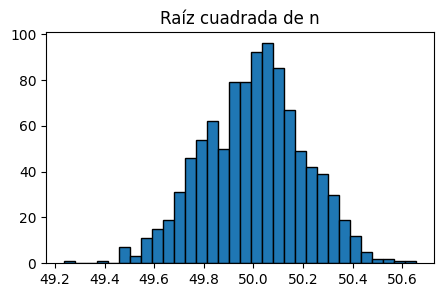

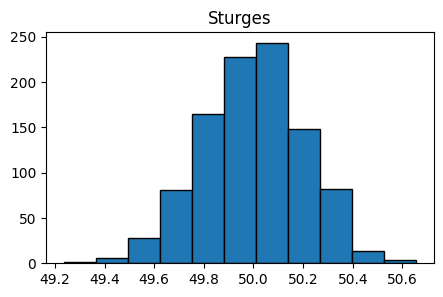

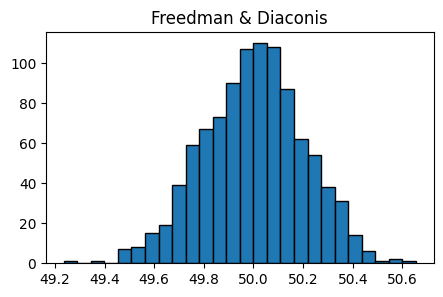

In [ ]:
plt.figure(figsize= (5,3))
plt.hist(lista_numeros1, bins = 'sqrt', edgecolor='black')
plt.title('Raíz cuadrada de n')

plt.figure(figsize= (5,3))
plt.hist(lista_numeros1, bins = 'sturges', edgecolor='black')
plt.title('Sturges')

plt.figure(figsize= (5,3))
plt.hist(lista_numeros1, bins = 'fd', edgecolor='black')
plt.title('Freedman & Diaconis')

plt.show()


### Caso 2. desvío estándar de 1000 y 1000 datos

In [ ]:
# Generar 1000 números con distribución normal
media2 = 50  # Media de la distribución
desviacion_estandar2 = 1000  # Desviación estándar
cantidad2 = 1000  # Cantidad de números

numeros_normales2 = np.random.normal(loc=media2, scale=desviacion_estandar2, size=cantidad2)

# Convertir a lista (opcional, numpy ya trabaja con arrays)
lista_numeros2 = numeros_normales2.tolist()


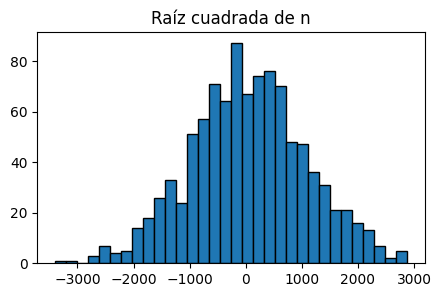

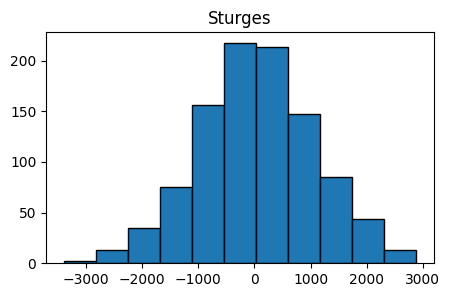

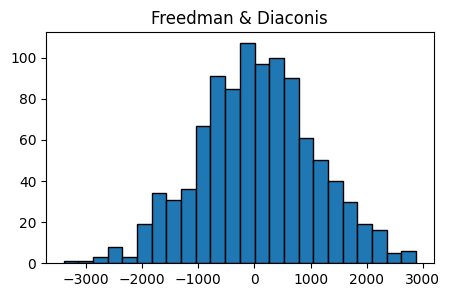

In [ ]:
plt.figure(figsize= (5,3))
plt.hist(lista_numeros2, bins = 'sqrt', edgecolor='black')
plt.title('Raíz cuadrada de n')

plt.figure(figsize= (5,3))
plt.hist(lista_numeros2, bins = 'sturges', edgecolor='black')
plt.title('Sturges')

plt.figure(figsize= (5,3))
plt.hist(lista_numeros2, bins = 'fd', edgecolor='black')
plt.title('Freedman & Diaconis')

plt.show()



### Caso 3: desvío estándar de 0.2 y 100 datos

In [ ]:
# Generar 1000 números con distribución normal
media3 = 50  # Media de la distribución
desviacion_estandar3 = 0.2  # Desviación estándar
cantidad3 = 100  # Cantidad de números

numeros_normales3 = np.random.normal(loc=media3, scale=desviacion_estandar3, size=cantidad3)

# Convertir a lista (opcional, numpy ya trabaja con arrays)
lista_numeros3 = numeros_normales3.tolist()

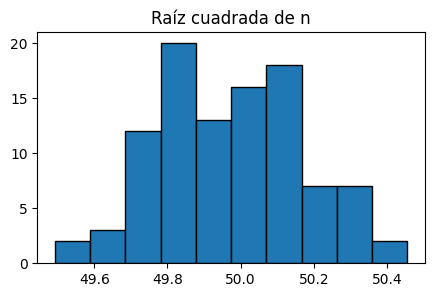

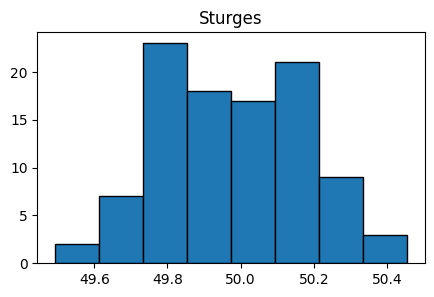

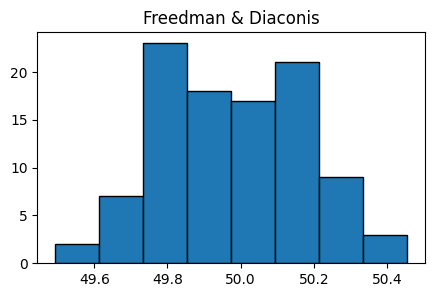

In [ ]:
plt.figure(figsize= (5,3))
plt.hist(lista_numeros3, bins = 'sqrt', edgecolor='black')
plt.title('Raíz cuadrada de n')

plt.figure(figsize= (5,3))
plt.hist(lista_numeros3, bins = 'sturges', edgecolor='black')
plt.title('Sturges')

plt.figure(figsize= (5,3))
plt.hist(lista_numeros3, bins = 'fd', edgecolor='black')
plt.title('Freedman & Diaconis')

plt.show()

### Caso 4: desvío estándar de 1000 y 100 datos

In [ ]:
# Generar 1000 números con distribución normal
media4 = 50  # Media de la distribución
desviacion_estandar4 = 1000  # Desviación estándar
cantidad4 = 100  # Cantidad de números

numeros_normales4 = np.random.normal(loc=media4, scale=desviacion_estandar4, size=cantidad4)

# Convertir a lista (opcional, numpy ya trabaja con arrays)
lista_numeros4 = numeros_normales4.tolist()


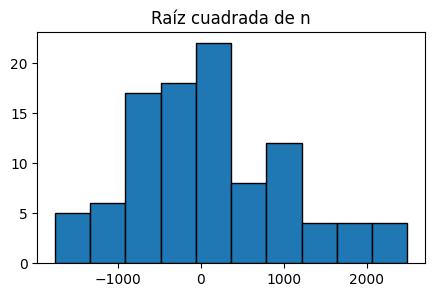

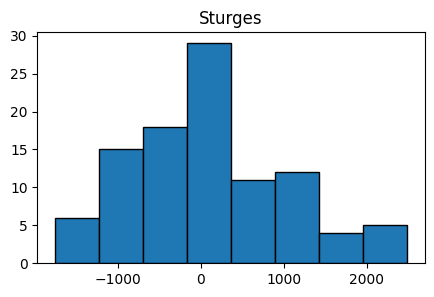

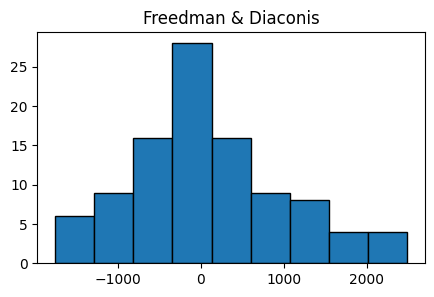

In [ ]:
plt.figure(figsize= (5,3))
plt.hist(lista_numeros4, bins = 'sqrt', edgecolor='black')
plt.title('Raíz cuadrada de n')

plt.figure(figsize= (5,3))
plt.hist(lista_numeros4, bins = 'sturges', edgecolor='black')
plt.title('Sturges')

plt.figure(figsize= (5,3))
plt.hist(lista_numeros4, bins = 'fd', edgecolor='black')
plt.title('Freedman & Diaconis')

plt.show()

Como se puede apreciar, la cantidad de intervalos depende fundamentalmente del tamaño de la muestra.

### Intervalos de desigual amplitud

Cuando los intervalos no tienen igual amplitud, hay que ser muy cuidadoso con la gráfica, porque podemos sobreestimar al intervalo más grande.

Lo importante es conservar la superficie relativa al total de la figura que la cantidad de datos representa en el histograma. Eso lo hacemos con el argumento *density*.

#### Intervalos iguales

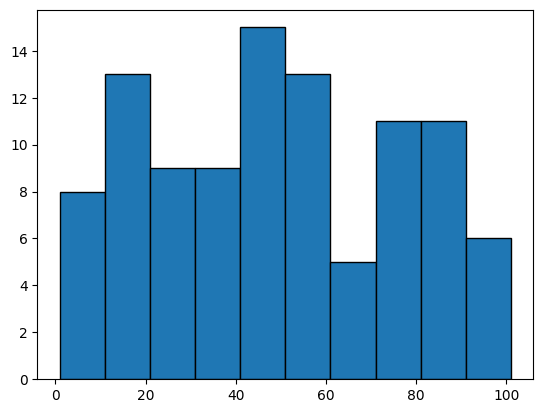

In [ ]:
plt.hist(datos, bins = [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101], edgecolor='black')
plt.show()

#### Sobreestimación

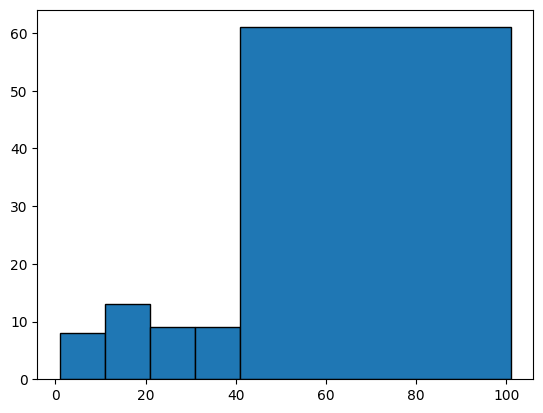

In [ ]:
plt.hist(datos, bins = [1, 11, 21, 31, 41, 101], edgecolor='black')
plt.show()

#### Corrección con *density*

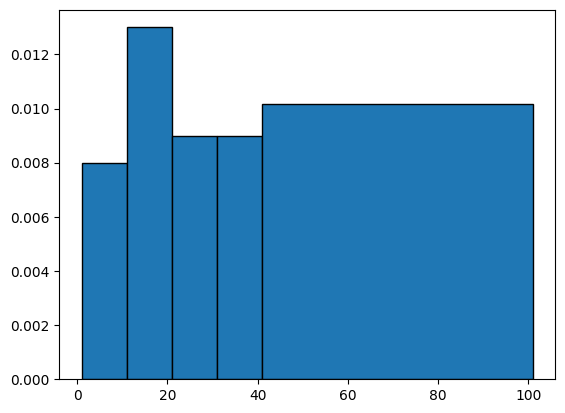

In [ ]:
plt.hist(datos, bins = [1, 11, 21, 31, 41, 101], edgecolor='black', density= True)
plt.show()